## Bot-IoT Dataset Graph Representation using NetworkX
### Introduction
This project aims to analyze the Bot-IoT dataset by representing its components and interactions as a graph using NetworkX in Python. The dataset comprises network platforms, simulated IoT services, and features extracted for forensics analytics. By employing NetworkX, this study seeks to elucidate the structural properties, connectivity patterns, and centrality measures within the Bot-IoT network, offering insights into its dynamics and vulnerabilities.

### Importing modules

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

## Dataset Description
The Bot-IoT Dataset offers a comprehensive view of network interactions within a simulated environment. This dataset is invaluable for understanding and mitigating cybersecurity threats, particularly those targeting Internet of Things (IoT) devices. In this project, we aim to represent this dataset as a graph using Python's NetworkX library, facilitating visual analysis and insights into the network's structure and behavior.

### Network Platforms
The dataset includes normal and attacking VMs, alongside network devices like firewalls and taps.

### Simulated IoT Services
IoT devices are simulated, which periodically submit the messages to local and cloud-based brokers. Notable IoT scenarios include weather stations, smart fridges, motion-activated lights, garage doors, and smart thermostats.

In [2]:
# low_memory used to load the entire file into memory and deal with the mixed data types
df = pd.read_csv('final.csv', low_memory=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148521 entries, 0 to 148520
Data columns (total 35 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   pkSeqID       148521 non-null  int64  
 1   stime         148521 non-null  float64
 2   flgs          148521 non-null  object 
 3   proto         148521 non-null  object 
 4   saddr         148521 non-null  object 
 5   sport         148079 non-null  object 
 6   daddr         148521 non-null  object 
 7   dport         148079 non-null  object 
 8   pkts          148521 non-null  int64  
 9   bytes         148521 non-null  int64  
 10  state         148521 non-null  object 
 11  ltime         148521 non-null  float64
 12  seq           148521 non-null  int64  
 13  dur           148521 non-null  float64
 14  mean          148521 non-null  float64
 15  stddev        148521 non-null  float64
 16  smac          0 non-null       float64
 17  dmac          0 non-null       float64
 18  sum 

In [4]:
# Removing NaN values
df.dropna(inplace=True, how='all', axis=1)
df.dropna(inplace=True, how='any', axis=0)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148079 entries, 0 to 148520
Data columns (total 29 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   pkSeqID       148079 non-null  int64  
 1   stime         148079 non-null  float64
 2   flgs          148079 non-null  object 
 3   proto         148079 non-null  object 
 4   saddr         148079 non-null  object 
 5   sport         148079 non-null  object 
 6   daddr         148079 non-null  object 
 7   dport         148079 non-null  object 
 8   pkts          148079 non-null  int64  
 9   bytes         148079 non-null  int64  
 10  state         148079 non-null  object 
 11  ltime         148079 non-null  float64
 12  seq           148079 non-null  int64  
 13  dur           148079 non-null  float64
 14  mean          148079 non-null  float64
 15  stddev        148079 non-null  float64
 16  sum           148079 non-null  float64
 17  min           148079 non-null  float64
 18  max 

The dataset includes features extracted from network traffic, such as packet sizes, timestamps, and protocol types.

In [6]:
# rename the columns for better understanding
df.rename(columns={
    "pkSeqID": "ID",  # The identifier of the row
    "stime": "StartTime",  # Record start time
    "ltime": "LastTime",  # Record last time
    "flgs": "Flags", # Flow state flags seen in transactions
    "seq": "ArgusSequenceNumber",  # Argus sequence number
    "dur": "TotalDuration",  # Record total duration
    "mean": "AverageDuration",  # Average duration of aggregated records
    "stddev": "StandardDeviation",  # Standard deviation of aggregated records
    "sum": "TotalDurationAggregated",  # Total duration of aggregated records
    "proto": "Protocol",  # Textual representation of transaction protocols present in network flow
    "saddr": "SourceIPAddress",  # Source IP address
    "sport": "SourcePort",  # Source port number
    "daddr": "DestinationIPAddress",  # Destination IP address
    "dport": "DestinationPort",  # Destination port number
    "pkts": "PacketCount",  # Total count of packets in transaction
    "bytes": "TotalBytes",  # Total number of bytes in transaction records
    "state": "TransactionState",  # Transaction state
    "min": "MinimumDuration",  # Minimum duration of aggregated records
    "max": "MaximumDuration",  # Maximum duration of aggregated records
    "spkts": "SourceToDestinationPacketCount",  # Source-to-destination packet count
    "dpkts": "DestinationToSourcePacketCount",  # Destination-to-source packet count
    "sbytes": "SourceToDestinationByteCount",  # Source-to-destination byte count
    "dbytes": "DestinationToSourceByteCount",  # Destination-to-source byte count
    "rate": "TotalPacketsPerSecond",  # Total packets per second in transaction
    "srate": "SourceToDestinationPacketsPerSecond",  # Source-to-destination packets per second
    "drate": "DestinationToSourcePacketsPerSecond",  # Destination-to-source packets per second
    "attack": "Attack",  # Class label: 0 for Normal traffic, 1 for Attack Traffic
    "category": "TrafficCategory",  # Traffic category
    "subcategory ": "TrafficSubcategory"  # Traffic subcategory
}, inplace=True)

### Columns encoding
The columns of type object have to be encoded to be represented in numerical form in order to calculate the correlation matrix

In [7]:
object_columns = df.select_dtypes(include='object').columns.tolist()
print(object_columns)

['Flags', 'Protocol', 'SourceIPAddress', 'SourcePort', 'DestinationIPAddress', 'DestinationPort', 'TransactionState', 'TrafficCategory', 'TrafficSubcategory']


In [8]:
encoder = LabelEncoder()

encoded_df = df.copy()

for col in object_columns:
    encoded_df[col] = encoder.fit_transform(encoded_df[col])

encoded_df.drop(object_columns, axis=1, inplace=True)

### Correlation matrix
The calculated matrix allows us to see the strength of the linear relationship between the columns in the dataset

In [9]:
matrix = encoded_df.corr()
matrix

,ID,StartTime,PacketCount,TotalBytes,LastTime,ArgusSequenceNumber,TotalDuration,AverageDuration,StandardDeviation,TotalDurationAggregated,MinimumDuration,MaximumDuration,SourceToDestinationPacketCount,DestinationToSourcePacketCount,SourceToDestinationByteCount,DestinationToSourceByteCount,TotalPacketsPerSecond,SourceToDestinationPacketsPerSecond,DestinationToSourcePacketsPerSecond,Attack
ID,1.000000,0.470698,-0.024386,-0.014468,0.470692,0.389266,-0.019094,0.631710,0.554032,0.012648,0.351780,0.718342,-0.025696,-0.016606,-0.017896,-0.007610,-0.105768,-0.062936,-0.093811,0.163432
StartTime,0.470698,1.000000,-0.018967,0.004697,1.000000,0.056177,0.052475,0.420123,0.393836,-0.033677,0.222744,0.482976,-0.027301,-0.003057,-0.009685,0.010720,-0.172005,-0.074104,-0.113512,0.318215
PacketCount,-0.024386,-0.018967,1.000000,0.715828,-0.018876,-0.031292,0.590253,0.085653,-0.010128,0.679010,0.059265,0.053992,0.923680,0.856300,0.658133,0.497546,-0.004594,-0.002332,-0.003342,-0.139233
TotalBytes,-0.014468,0.004697,0.715828,1.000000,0.004746,-0.018494,0.312593,0.048007,0.000743,0.325024,0.024864,0.031664,0.530994,0.788468,0.544348,0.894736,-0.002624,-0.001384,-0.001757,-0.061612
LastTime,0.470692,1.000000,-0.018876,0.004746,1.000000,0.056164,0.052629,0.420135,0.393839,-0.033546,0.222748,0.482986,-0.027199,-0.003002,-0.009620,0.010743,-0.172010,-0.074106,-0.113516,0.318185
ArgusSequenceNumber,0.389266,0.056177,-0.031292,-0.018494,0.056164,1.000000,-0.082930,0.250236,0.220720,-0.027968,0.131308,0.274167,-0.033461,-0.020651,-0.022732,-0.009805,-0.059362,0.070020,0.153081,0.151155
TotalDuration,-0.019094,0.052475,0.590253,0.312593,0.052629,-0.082930,1.000000,0.096286,0.042195,0.846206,0.040519,0.089524,0.656360,0.355605,0.418102,0.147687,-0.037127,-0.021755,-0.032629,-0.181554
AverageDuration,0.631710,0.420123,0.085653,0.048007,0.420135,0.250236,0.096286,1.000000,0.468427,0.172258,0.758743,0.890596,0.093286,0.054244,0.060201,0.024816,-0.100738,-0.058328,-0.088948,0.105014
StandardDeviation,0.554032,0.393836,-0.010128,0.000743,0.393839,0.220720,0.042195,0.468427,1.000000,0.037056,-0.146377,0.785462,-0.012699,-0.004166,-0.005298,0.003701,-0.090941,-0.053336,-0.080360,0.130949
TotalDurationAggregated,0.012648,-0.033677,0.679010,0.325024,-0.033546,-0.027968,0.846206,0.172258,0.037056,1.000000,0.117460,0.134958,0.777840,0.378368,0.482785,0.127976,-0.012906,-0.007391,-0.011228,-0.190272


The matrix is filtered to show only pairs above the threshold to display only highly correlated pairs.
Here we can see a strong correlation between total bytes size of the requests and the number of sent tokens, which is logical.

In [10]:
# Find pairs with correlation greater than a threshold
threshold = 0.7
highly_correlated_pairs = matrix[abs(matrix) > threshold].stack().reset_index()

# Filter out self correlation (i.e. correlation of 1)
highly_correlated_pairs = highly_correlated_pairs[highly_correlated_pairs['level_0'] != highly_correlated_pairs['level_1']]

# Sort the values in 'level_0' and 'level_1' for each row
highly_correlated_pairs[['level_0', 'level_1']] = np.sort(highly_correlated_pairs[['level_0', 'level_1']].values, axis=1)

# Drop duplicates
highly_correlated_pairs = highly_correlated_pairs.drop_duplicates().reset_index(drop=True)

# Sort by correlation
highly_correlated_pairs = highly_correlated_pairs.sort_values(0, ascending=False)

highly_correlated_pairs

,level_0,level_1,0
1,LastTime,StartTime,1.000000
3,PacketCount,SourceToDestinationPacketCount,0.923680
6,DestinationToSourceByteCount,TotalBytes,0.894736
9,AverageDuration,MaximumDuration,0.890596
4,DestinationToSourcePacketCount,PacketCount,0.856300
7,TotalDuration,TotalDurationAggregated,0.846206
5,DestinationToSourcePacketCount,TotalBytes,0.788468
10,MaximumDuration,StandardDeviation,0.785462
11,SourceToDestinationPacketCount,TotalDurationAggregated,0.777840
8,AverageDuration,MinimumDuration,0.758743


### Attack categories distribution
The provided dataset consisted of 72 000 000 records divided into smaller files of 1 000 000 records each. The records included different types of security attacks:
- DDoS
- DoS
- Reconnaisance
- Theft  
  
The dataset also contained normal traffic records. The records were selected evenly to include all types of attacks and normal traffic.

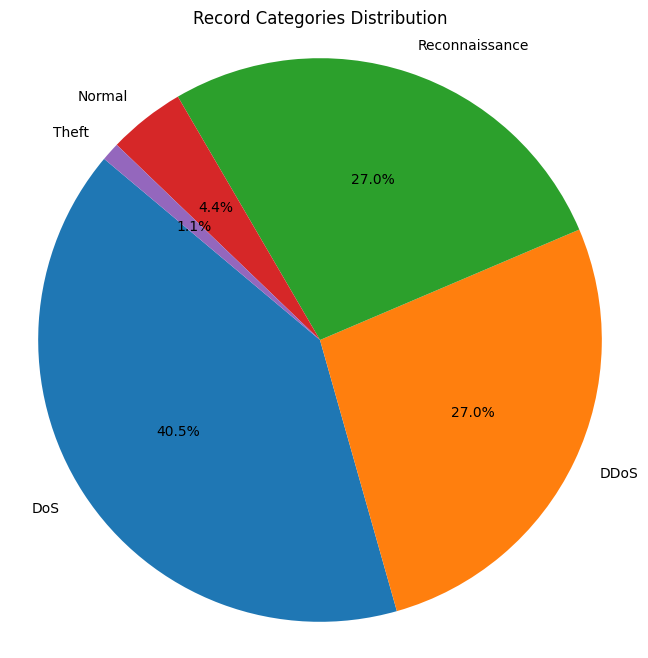

In [11]:
# get the counts of each category
value_counts = df['TrafficCategory'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)    
plt.title('Record Categories Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Attack subcategories distribution
The DDoS and DoS attacks were further divided into subcategories depending on the protocol. The dataset included the following subcategories:
- DDoS attacks
  - TCP flood
  - UDP flood  

- DoS attacks
  - HTTP flood
  - TCP flood
  - UDP flood  

The reconnaissance attacks were divided into the following subcategories:
- Service Scanning
- OS Fingerprinting
- Key Logging

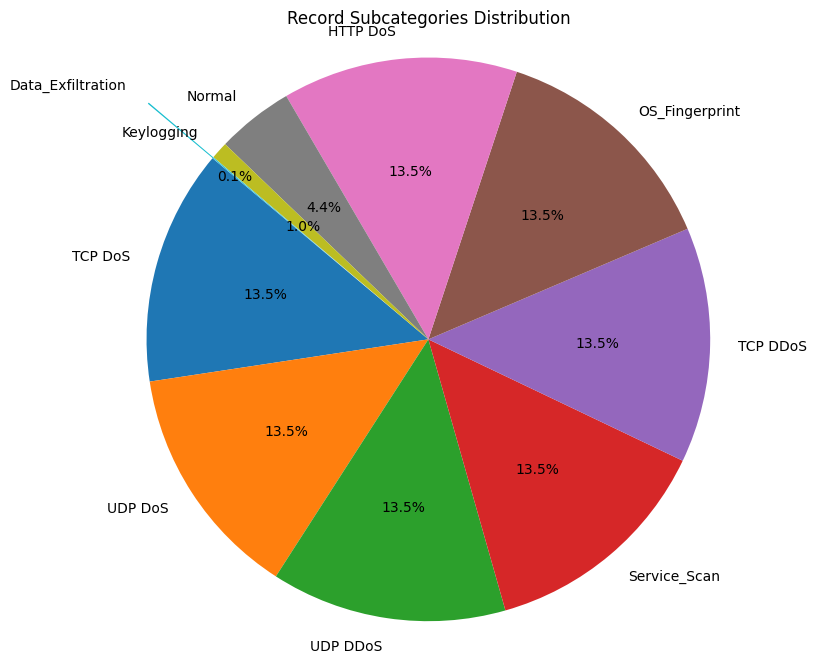

In [12]:
# get the counts of each category
value_counts = df['TrafficSubcategory'].value_counts()

# Define a function to calculate the offset of the slices which are too hard to see
def calculate_explode(values):
    explode_values = []
    total_values = values.sum()
    for value in values:
        if value / total_values < 0.009:
            explode_values.append(0.3)
        else:
            explode_values.append(0)
    return explode_values

# Calculate explode values
explode = calculate_explode(value_counts)

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140, explode=explode)    
plt.title('Record Subcategories Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## The Network Structure
### The Topology
The network of VMs consists of four Kali machines, Bot Kali 1 (192.168.100.150), Bot Kali 2 (192.168.100.149),
Bot Kali 3 (192.168.100.148), and Bot Kali 4 (192.168.100.147), an Ubuntu Server (192.168.100.3), Ubuntu mobile (192.168.100.5), Windows 7 (192.168.100.6),
Metasploitable (192.168.100.7) and an Ubuntu Tap machine (192.168.100.4).  
The Kali VMs, which belong to the attacking machines, performed port scanning, DDoS and other Botnet-related attacks by targeting the Ubuntu Server, Ubuntu mobile, Windows 7 and
Metasploitable VMs.
### IoT Services
The IoT services include a weather station, smart fridge, motion-activated light, garage door, and smart thermostat. These services communicate with local (Ubunru Server) and cloud-based brokers, which are represented by the MQTT protocols.

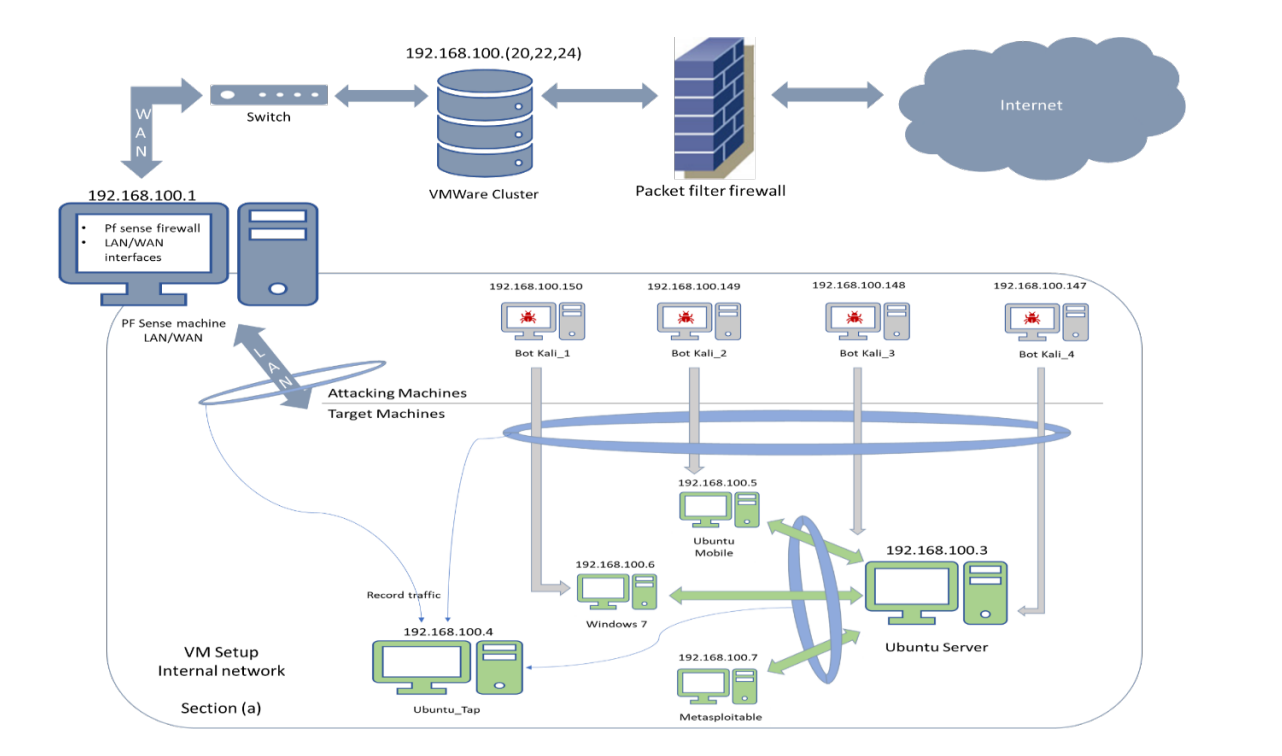

### Graph Representation
The importants devices were separated from the rest of the network and the graph was created using NetworkX. The graph was visualized using the multipartie layout algorithm, which allows to see the different layers of the network. The graph was further customized by adjusting the node colors, sizes, and labels to enhance readability.  

For convinience only 300 records were selected to be represented in the graph.

In [13]:
small_df = df.sample(n=300, random_state=42)

In [14]:
# Kali Linuxes IP addresses
attackers = ['192.168.100.150', '192.168.100.149', '192.168.100.147', '192.168.100.148']
# Devices IP addresses
devices = ['192.168.100.7', '192.168.100.3', '192.168.100.6', '192.168.100.5']

# Other IP addresses excluding attackers and devices and the tap interface
ubuntu_tap = "192.168.100.4"
others = small_df['SourceIPAddress'].value_counts().index.tolist() + small_df['DestinationIPAddress'].value_counts().index.tolist()
others = [x for x in others if x not in attackers and x not in devices and x not in [ubuntu_tap]]

The graph consists of 5 layers:
- The attacked devices
- Ubuntu Server
- The attacking Kali machines
- Ubuntu Tap
- Cloud IoT devices  

The attacked devices are painted in green, while the attacking devices are painted in red. Ubuntu Tap and cloud IoT devices are painted in blue.  
The normal requested are represented by green edges, while the attacks are represented by red edges.

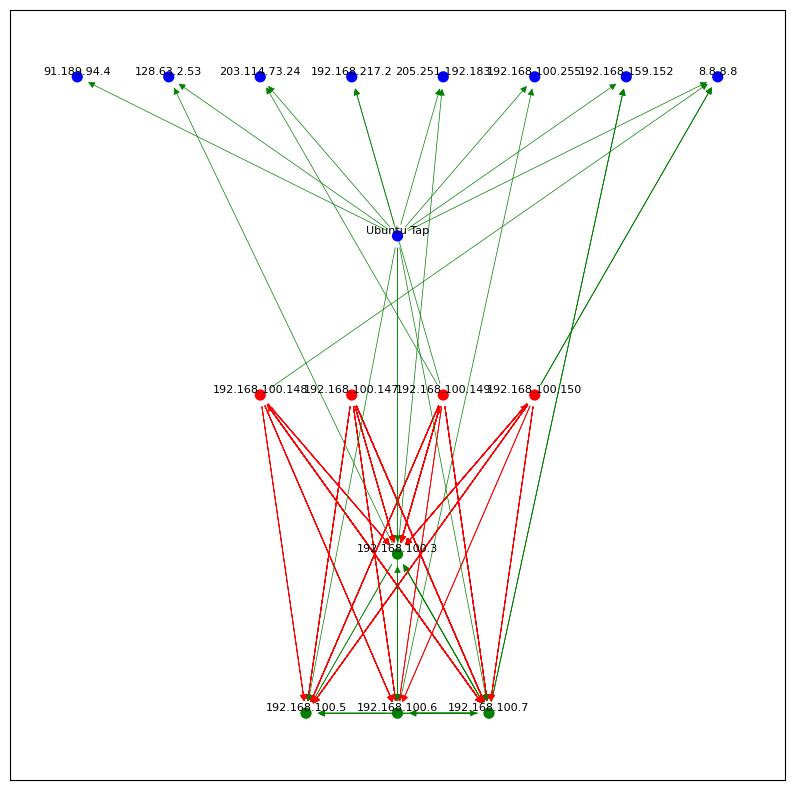

In [15]:
Graph = nx.MultiDiGraph()
Graph.add_nodes_from([x for x in devices if x != '192.168.100.3'], part=0)
# The server is displayed as a separate layer
Graph.add_nodes_from(["192.168.100.3"], part=1)
Graph.add_nodes_from(attackers, part=2)
# The tap interface is displayed as a separate layer
Graph.add_nodes_from([ubuntu_tap], part=3)
Graph.add_nodes_from(others, part=4)

labels = {}  # Initialize labels dictionary
labels[ubuntu_tap] = "Ubuntu Tap"  # Add label for tap interface

# add eges of each attacker
for attacker in attackers:
    labels[attacker] = attacker # Add label for attacker
    df_attacker = small_df[(small_df['SourceIPAddress'] == attacker) | (small_df['DestinationIPAddress'] == attacker)] # Filter rows with attacker
    for index, row in df_attacker.iterrows():
        edge_color = 'red' if row['Attack'] == 1 else 'green'  # Set edge color based on attack label

        if row['SourceIPAddress'] == attacker: # Handle the direction of the edge
            Graph.add_edge(attacker, row['DestinationIPAddress'], key=index, color=edge_color)
        else:
            Graph.add_edge(row['SourceIPAddress'], attacker, key=index, color=edge_color)

# add edges of each device
for ubuntu_ip in devices:
    labels[ubuntu_ip] = ubuntu_ip   # Add label for device
    df_ubuntu = small_df[(~small_df['SourceIPAddress'].isin(attackers)) & (~small_df['DestinationIPAddress'].isin(attackers))] # Filter rows with device
    for index, row in df_ubuntu.iterrows():
        edge_color = "green"
        if row['SourceIPAddress'] == ubuntu_ip: # Handle the direction of the edge
            Graph.add_edge(ubuntu_ip, row['DestinationIPAddress'], key=index, color=edge_color)
        else:
            Graph.add_edge(row['SourceIPAddress'], ubuntu_ip, key=index, color=edge_color)

# add edges of the other IP addresses
for other_ip in others:
    labels[other_ip] = other_ip # Add label for other IP
    df_other = small_df[(~small_df['SourceIPAddress'].isin(attackers)) & (~small_df['DestinationIPAddress'].isin(attackers)) & (~small_df['SourceIPAddress'].isin(devices)) & (~small_df['DestinationIPAddress'].isin(devices))]
    for index, row in df_other.iterrows():
        edge_color = "green"
        if row['SourceIPAddress'] == other_ip: # Handle the direction of the edge
            Graph.add_edge(other_ip, row['DestinationIPAddress'], key=index, color=edge_color)
        else:
            Graph.add_edge(row['SourceIPAddress'], other_ip, key=index, color=edge_color)

# multi-partite layout is used to display the nodes in different layers
pos = nx.multipartite_layout(Graph, subset_key="part", align='horizontal')

# Set node colors based on the node type
node_colors = ['green' if node in devices else 'red' if node in attackers else 'blue' for node in Graph.nodes()]

plt.figure(figsize=(10, 10))
nx.draw_networkx_nodes(Graph, pos, node_color=node_colors, node_size=50)
edges = nx.draw_networkx_edges(Graph, pos, edge_color=[d['color'] for u, v, d in Graph.edges(data=True)], width=0.5)
nx.draw_networkx_labels(Graph, pos, labels=labels, font_size=8, verticalalignment='bottom') 
plt.show()

### Part 2
First representation uses “IP” as a node and an event as edges.  
This representation allows to see which devices send the attacks and which devices send only regular requests.

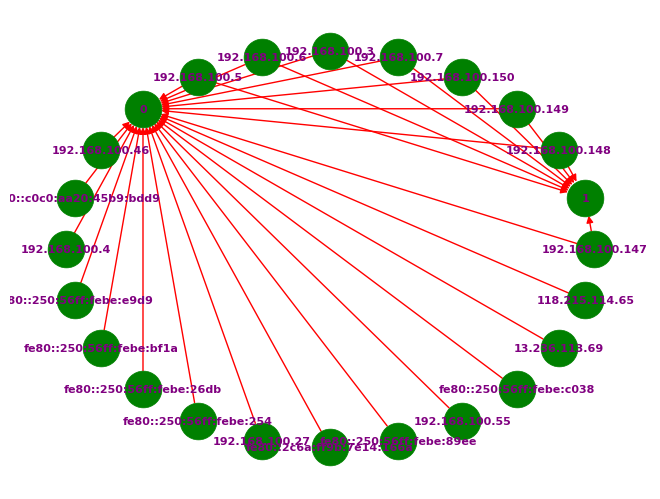

In [16]:
def representation(data, node, edge):
  Graph = nx.from_pandas_edgelist(data, node, edge, create_using = nx.DiGraph())
  pos = nx.circular_layout(Graph)
  nx.draw(Graph, pos, with_labels = True, font_weight = "bold", node_size = 700, node_color = "green", 
          font_size = 8, edge_color = "red", linewidths = 0.5, font_color = "purple")
  plt.show()

representation(df, "SourceIPAddress", "Attack") # First representation

Second representation uses event (row) as a node.  
This representation is the reverse of the first one, it allows to see which events are sent by which devices.

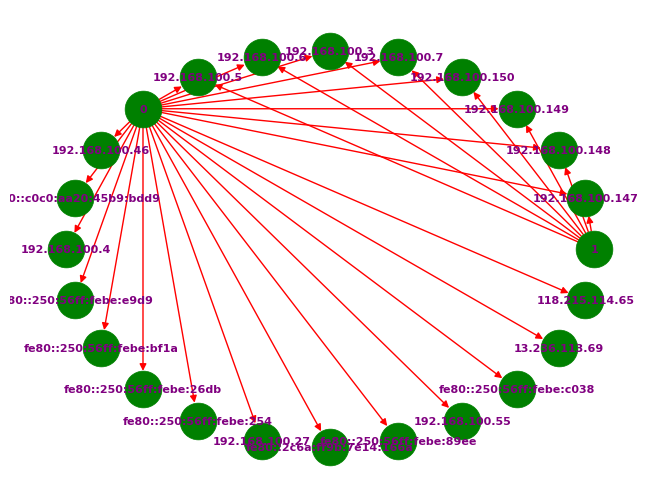

In [17]:
representation(df, "Attack", "SourceIPAddress") # Second representation

Third representation uses any attribute that you decide as a node.  
This representation allows to see which protocols are used by which devices.

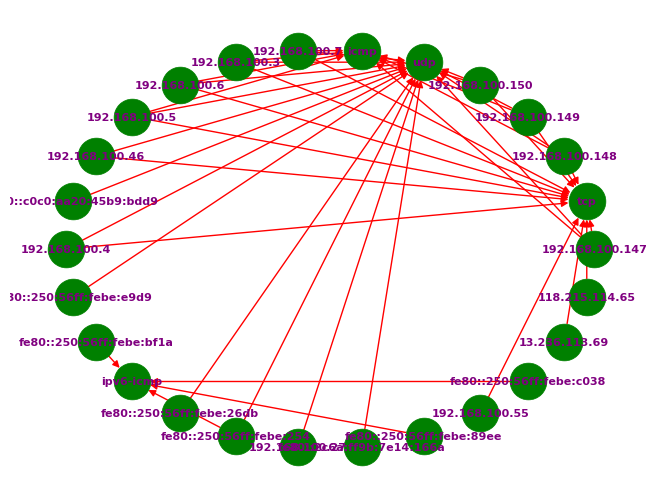

In [18]:
representation(df, "SourceIPAddress", "Protocol") # Third representation

The user can decide which attribute as node and which attribute as edges.

In [19]:
# Fourth representation
# user_node = input("Enter the attribute that will be used as a node: ") # For example: SourceIPAddress
# user_edge = input("Enter the attribute that will be used as an edge: ") # For example: Protocol
# representation(df, user_node, user_edge)

### Part 3
The Breadth First Search algorithm was used to find the shortest path between two nodes.

In [20]:
import networkx as nx

def bfs(G: nx.DiGraph, start: str, end: str):
    # Check if the start and end nodes are in the graph
    if start not in G.nodes() or end not in G.nodes():
        return None

    # Initialize a queue to store nodes to be explored
    queue = [(start, [start])]

    # While there are nodes in the queue
    while queue:
        # Dequeue a node and its path
        node, path = queue.pop(0)

        # Check if the current node is the end node
        if node == end:
            return path

        # Explore neighbors of the current node
        for neighbor in G.neighbors(node):
            # Avoid revisiting nodes already in the path
            if neighbor not in path:
                # Enqueue neighbor node and its path
                queue.append((neighbor, path + [neighbor]))

    # If the end node is not reached, return None
    return None

The packets are calculated by the PacketCount property of the dataset.

In [21]:
def calculate_packets(Graph, path):
  packets = 0

  for i in range(len(path) - 1):
    origin = path[i]
    destination = path[i + 1]

    if Graph.has_edge(origin, destination):
      packets += Graph[origin][destination]["PacketCount"]
    else:
      print(f"Warning: No direct edge between {origin} and {destination}")

  return packets

The following code allows to find the shortest path between two nodes in the graph and calculate the number of packets that were sent between them.

In [50]:
Graph = nx.from_pandas_edgelist(df, "SourceIPAddress", "DestinationIPAddress", ["Attack", "PacketCount"], 
                                create_using = nx.DiGraph())
graph_dict = dict(Graph.adjacency())

origin = "192.168.100.150"
destination = "91.189.94.4"

path = bfs(Graph, origin, destination)

print("\n", end = "")
if path:
  print(f"Path from {origin} to {destination}: ")
  for ip in path:
    if ip != path[-1]:
      print(f"{ip} -> ", end = "")
    else:
      print(ip)
  
  packets = calculate_packets(Graph, path)
  print(f"Total number of sent packets: {packets}")
else:
  print(f"No path found from {origin} to {destination}")
print("\n", end = "")


Path from 192.168.100.150 to 91.189.94.4: 
192.168.100.150 -> 192.168.100.7 -> 192.168.100.4 -> 91.189.94.4
Total number of sent packets: 12



This code allows to visualize the found path.

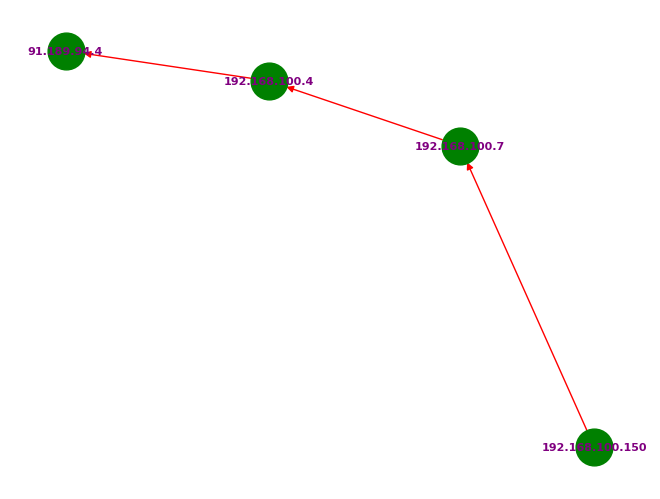

In [51]:
path_edges = [(path[i], path[i + 1]) for i in range(len(path) - 1)]
path_graph = Graph.edge_subgraph(path_edges)
pos = nx.spring_layout(path_graph)
nx.draw(path_graph, pos, with_labels=True, font_weight="bold", font_size = 8, node_color="green", 
        node_size = 700, edge_color = "red", font_color = "purple")
plt.show()

### Part 4
The colors are applied to the plot to represent the differences between protocols.

In [24]:
def representation_with_colors(data, node, edge, colors):
  Graph = nx.from_pandas_edgelist(data, node, edge, create_using = nx.DiGraph())
  
  # Create a dictionary to store the colors of the source IP addresses
  source_ip_colors = {ip: color for ip, color in zip(data["Protocol"].unique(), colors)}

  # Set the color of the nodes based on the source IP address
  node_colors = [source_ip_colors.get(ip, "green") for ip in Graph.nodes()]

  pos = nx.circular_layout(Graph)
  nx.draw(Graph, pos, with_labels = True, font_weight = "bold", node_size = 700, node_color = node_colors,
      edge_color = "red", font_size = 8, linewidths = 0.5, font_color = "purple") 

  plt.show()

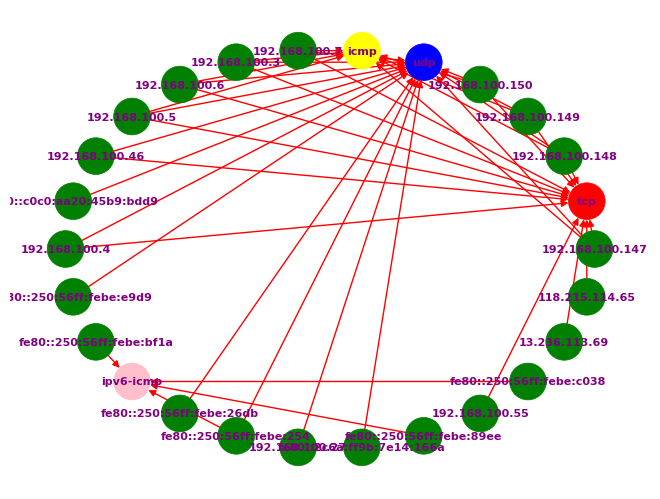

In [25]:
colors = ["red", "blue", "yellow", "pink"]
protocols = ["tcp", "udp", "icmp", "ipv6-icmp"]

representation_with_colors(df, "SourceIPAddress", "Protocol", colors)

Graph = nx.from_pandas_edgelist(df, "SourceIPAddress", "DestinationIPAddress", ["Attack", "PacketCount"], create_using=nx.DiGraph())

The automated code with user input:

In [27]:
# colors = []
# protocols = ["tcp", "udp", "icmp", "ipv6-icmp"]

# for index in range(len(protocols)):
#   color = input(f"Enter the color for the protocol {protocols[index]}: ")
#   colors.append(color)

# representation_with_colors(df, "SourceIPAddress", "Protocol", colors)

# Graph = nx.from_pandas_edgelist(df, "SourceIPAddress", "DestinationIPAddress", ["Attack", "PacketCount"], create_using=nx.DiGraph())

### Part 5
Various tools are used to analyze the network structure and behavior, including:
- Degree centrality
- Closeness centrality
- Betweenness centrality
- Network diameter
- Network density
- Network Average Path Length

In [54]:
Graph = nx.from_pandas_edgelist(small_df, "SourceIPAddress", "DestinationIPAddress", ["Attack", "PacketCount"], create_using=nx.DiGraph())

In [47]:
def plot_xy_graph(quantity, graph_name, x_label, y_label):
  quantity_nodes = list(quantity.keys())
  quantity_values = list(quantity.values())

  plt.scatter(quantity_nodes, quantity_values, s = 5)
  
  # Add vertical dotted lines
  for x, y in zip(quantity_nodes, quantity_values):
    plt.vlines(x, 0, y, linestyles='dotted')
  
  plt.title(graph_name)
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  
  # Rotate x-axis labels
  plt.xticks(rotation=45, ha='right')
  
  plt.show()

#### Degree connectivity
Degree connectivity is the number of edges connected to a node.  
It is possible to see that 192.168.100.3 (the Ubuntu Server) has the highest degree connectivity, which means that it is the most connected node in the network.  
The Kali machines also have relatively high degree connectivity, as they are the attacking all other machines.  
The attacked machines have lower degree connectivity, as they are only sending request to the server and cloud IoT services.  
The cloud IoT services have the lowest degree connectivity, as they are only receiving requests from the Ubuntu Sever and devices.

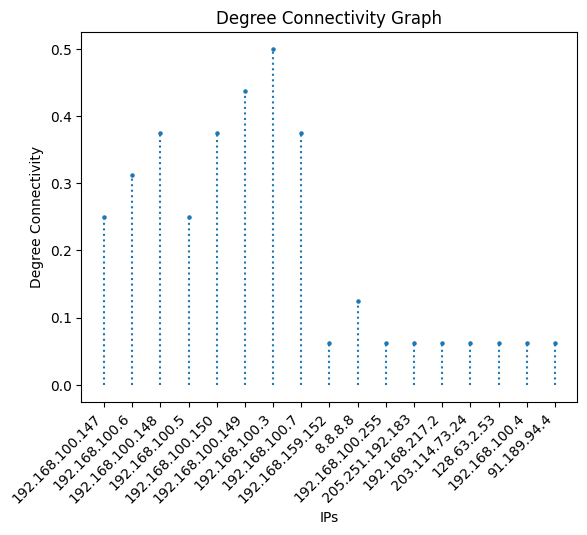

In [48]:
# Degree connectivity
degree_connectivity = nx.degree_centrality(Graph)
plot_xy_graph(degree_connectivity, "Degree Connectivity Graph", "IPs", "Degree Connectivity")

#### Closeness centrality
Closeness centrality is the average shortest path length from a node to all other nodes in the network.  
The Ubuntu Server and the devices that are directly connected to it have the highest closeness centrality, as they are the most central nodes in the network.  
The Kali machines have lower closeness centrality, as they are not directly accessing the cloud IoT services.

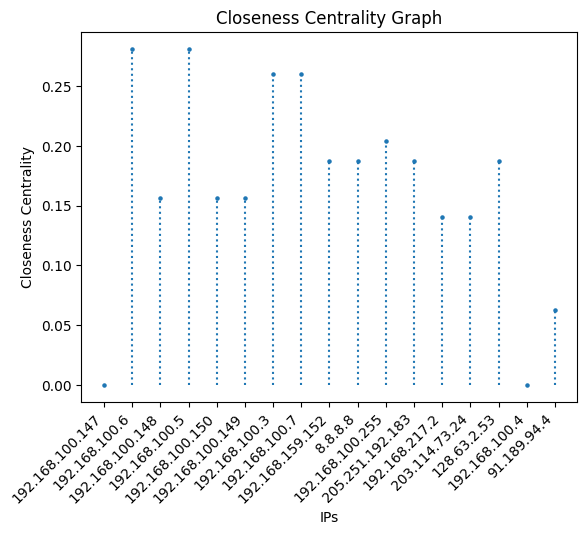

In [57]:
# Closeness connectivity
closeness_centrality = nx.closeness_centrality(Graph, distance='TotalDuration')
plot_xy_graph(closeness_centrality, "Closeness Centrality Graph", "IPs", "Closeness Centrality")

#### Betweenness centrality
Betweenness centrality is the number of shortest paths that pass through a node.  
The Ubuntu Server has the highest betweenness centrality, as it is the most central node in the network.

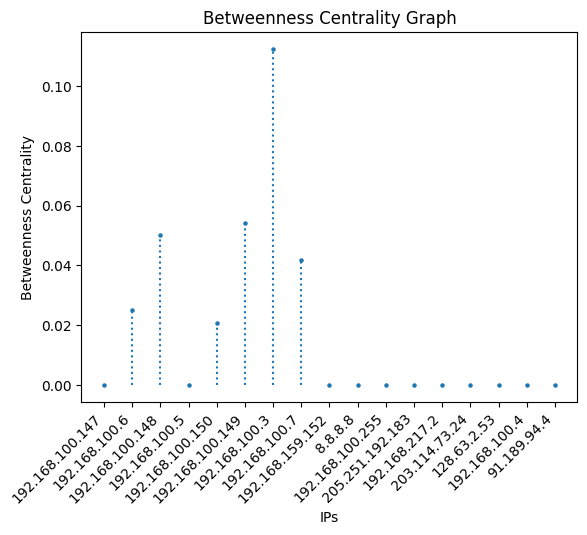

In [58]:
# Betweenness centrality
betweenness_centrality = nx.betweenness_centrality(Graph)
plot_xy_graph(betweenness_centrality, "Betweenness Centrality Graph", "IPs", "Betweenness Centrality")

#### Network Density
Network density is the ratio of the number of edges in the network to the number of possible edges in the network.  
The network density is 0.1, which means that only 10% of the possible edges are present in the network.

In [39]:
# Network Density
network_density = nx.density(Graph)
print("Network Density:", network_density)

Network Density: 0.10294117647058823


#### Network Diameter
Network diameter is the longest shortest path between any two nodes in the network.  
The network diameter is 3, which means that the longest shortest path between any two nodes in the network is 3.

#### Network Average Path Length
Network average path length is the average shortest path length between any two nodes in the network.  
The network average path length is 1.7, which means that the average shortest path length between any two nodes in the network is 1.7.

In [40]:
# Network Diameter and Network average Path Length
largest_strongly_connected_component = max(nx.strongly_connected_components(Graph), key=len)
subgraph = Graph.subgraph(largest_strongly_connected_component)

network_diameter = nx.diameter(subgraph)
average_path_length = nx.average_shortest_path_length(subgraph)
print("Network Diameter:", network_diameter)
print("Network Average Path Length:", average_path_length)

Network Diameter: 3
Network Average Path Length: 1.7


### Metrics Summary
As it can be seen, the degree connectivity, closeness centrality and betweenness centrality match the graph representation of the network.  

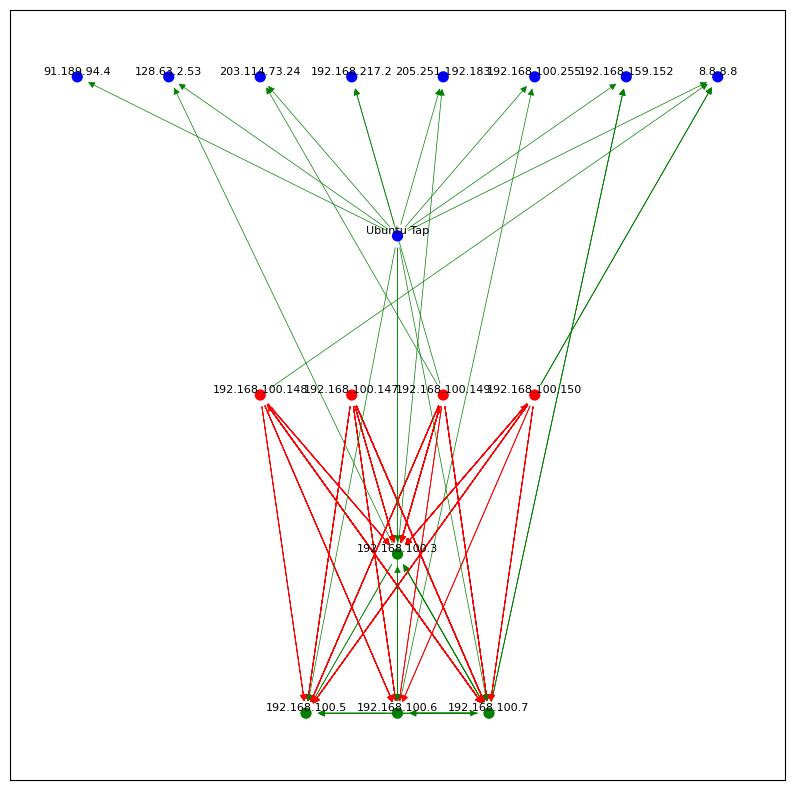  

The Ubuntu Server (192.168.100.3) has the highest degree connectivity, closeness centrality and betweenness centrality, as it is the most central node in the network.  
The IoT services are proven to have the lowest degree connectivity, closeness centrality and betweenness centrality, as they are only receiving requests from the Ubuntu Server and devices.

### Other representations
The proposed multipartie graph is good, if the structure of the network is known in advance, but if the structure is unknown, the multipartie graph may not be the best choice.  
Here the spring layout algorithm is used to represent the graph. It is possible to determine the approximate structure of the network and the layers.

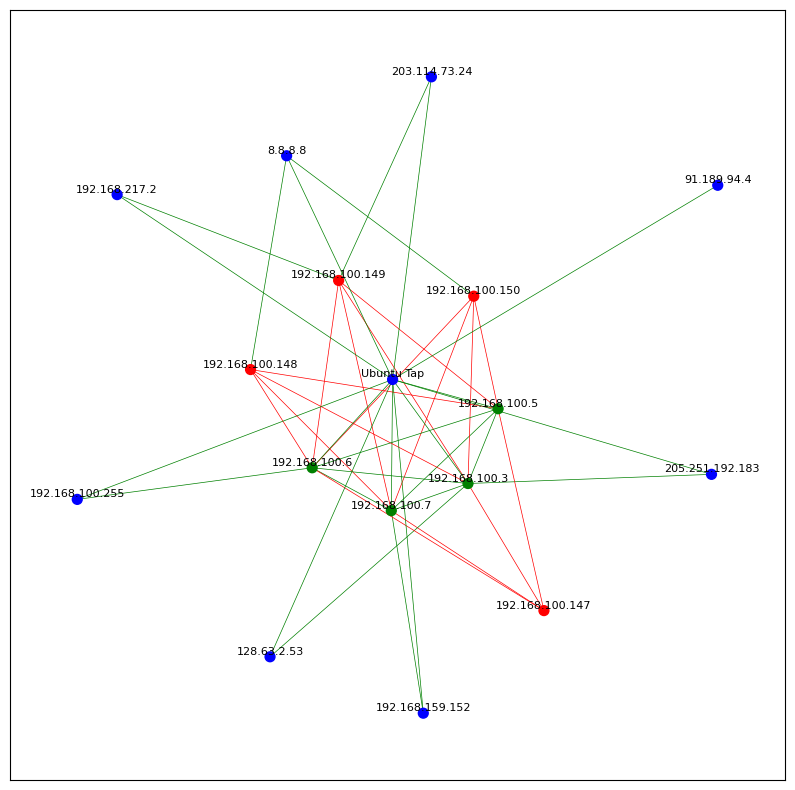

In [103]:
Graph = nx.Graph()
Graph.add_nodes_from(devices + attackers + others + [ubuntu_tap])

labels = {}  # Initialize labels dictionary
labels[ubuntu_tap] = "Ubuntu Tap"  # Add label for tap interface

# add eges of each attacker
for attacker in attackers:
    labels[attacker] = attacker # Add label for attacker
    df_attacker = small_df[(small_df['SourceIPAddress'] == attacker) | (small_df['DestinationIPAddress'] == attacker)] # Filter rows with attacker
    for index, row in df_attacker.iterrows():
        edge_color = 'red' if row['Attack'] == 1 else 'green'  # Set edge color based on attack label

        if row['SourceIPAddress'] == attacker: # Handle the direction of the edge
            Graph.add_edge(attacker, row['DestinationIPAddress'], key=index, color=edge_color)
        else:
            Graph.add_edge(row['SourceIPAddress'], attacker, key=index, color=edge_color)

# add edges of each device
for ubuntu_ip in devices:
    labels[ubuntu_ip] = ubuntu_ip   # Add label for device
    df_ubuntu = small_df[(~small_df['SourceIPAddress'].isin(attackers)) & (~small_df['DestinationIPAddress'].isin(attackers))] # Filter rows with device
    for index, row in df_ubuntu.iterrows():
        edge_color = "green"
        if row['SourceIPAddress'] == ubuntu_ip: # Handle the direction of the edge
            Graph.add_edge(ubuntu_ip, row['DestinationIPAddress'], key=index, color=edge_color)
        else:
            Graph.add_edge(row['SourceIPAddress'], ubuntu_ip, key=index, color=edge_color)

# add edges of the other IP addresses
for other_ip in others:
    labels[other_ip] = other_ip # Add label for other IP
    df_other = small_df[(~small_df['SourceIPAddress'].isin(attackers)) & (~small_df['DestinationIPAddress'].isin(attackers)) & (~small_df['SourceIPAddress'].isin(devices)) & (~small_df['DestinationIPAddress'].isin(devices))]
    for index, row in df_other.iterrows():
        edge_color = "green"
        if row['SourceIPAddress'] == other_ip: # Handle the direction of the edge
            Graph.add_edge(other_ip, row['DestinationIPAddress'], key=index, color=edge_color)
        else:
            Graph.add_edge(row['SourceIPAddress'], other_ip, key=index, color=edge_color)

# multi-partite layout is used to display the nodes in different layers
pos = nx.spring_layout(Graph)

# Set node colors based on the node type
node_colors = ['green' if node in devices else 'red' if node in attackers else 'blue' for node in Graph.nodes()]

plt.figure(figsize=(10, 10))
nx.draw_networkx_nodes(Graph, pos, node_color=node_colors, node_size=50)
edges = nx.draw_networkx_edges(Graph, pos, edge_color=[d['color'] for u, v, d in Graph.edges(data=True)], width=0.5)
nx.draw_networkx_labels(Graph, pos, labels=labels, font_size=8, verticalalignment='bottom') 
plt.show()

### Graph Analysis
By looking at the graph, it is possible to divide the network into LAN and WAN layers, where the LAN layer consists of the Ubuntu Server, Ubuntu mobile, Windows 7, Metasploitable, and Kali machines, and the WAN layer consists of the cloud IoT services.  
This division can be proved by applying the label propagation algorithm to the graph, which will divide the nodes into two clusters, showing the clear division between the LAN and WAN layers.

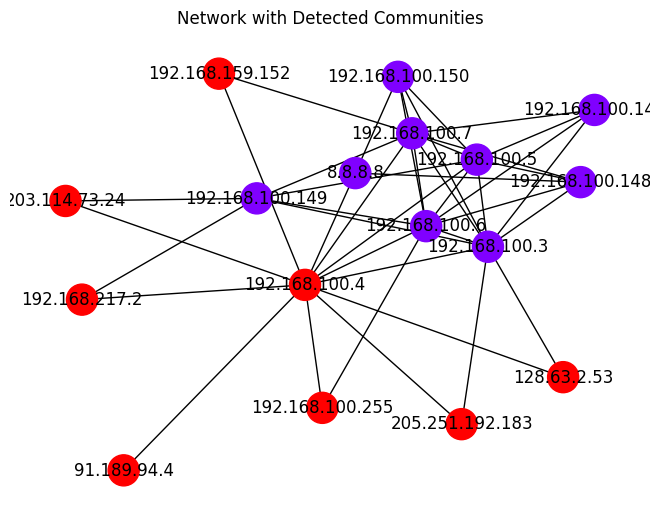

In [105]:
# Apply Label Propagation Algorithm
communities = nx.algorithms.community.label_propagation.label_propagation_communities(Graph)

# Assign colors to communities
colors = {}
for i, community in enumerate(communities):
    for node in community:
        colors[node] = i

# Draw the network with communities
pos = nx.spring_layout(Graph)
nx.draw(Graph, pos, with_labels=True, node_color=[colors[node] for node in Graph.nodes()], cmap=plt.cm.rainbow, node_size=500)
plt.title('Network with Detected Communities')
plt.show()


## Conclusion
The networkx module allowed to represent the Bot-IoT dataset as a graph, providing insights into the network's structure and behavior. The graph analysis revealed the centrality measures, connectivity patterns, and network properties, shedding light on the network's dynamics. The graph visualization facilitated the interpretation of the network's components and interactions, offering a comprehensive view of the Bot-IoT network. The analysis of the Bot-IoT dataset using NetworkX in Python has proven to be a valuable tool for understanding and mitigating cybersecurity threats, particularly those targeting IoT devices.  

